In [30]:
import numpy as np
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

**导入数据**

In [4]:
filename = 'housing.csv'
names = ['CRM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PRTATIO', 'B', 'LSTAT', 'MEDV']
data  = read_csv(filename, names = names, delim_whitespace=True)

**理解数据：**

In [4]:
data.shape  # 数据维度,506条记录，14个特征 

(506, 14)

In [5]:
data.dtypes #字段类型

CRM        float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PRTATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
data.head(10)  #前10条记录

,CRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRTATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [7]:
data.describe()  #描述性统计

,CRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRTATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
data.corr(method='pearson') #特征之间的关系，皮尔逊相关系数

,CRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRTATIO,B,LSTAT,MEDV
CRM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


**强关联关系(>0.7或<-0.7)：**<br>
NOX与INDUS之间的皮尔逊相关系数是0.76<br>
DIS与INDUS之间的皮尔逊相关系数是-0.71<br>
TAX与INDUS之间的皮尔逊相关系数是0.72<br>
AGE与NOX之间的皮尔逊相关系数是0.73<br>
DIS与NOX之间的皮尔逊相关系数是-0.77<br>

**查看特征图：**

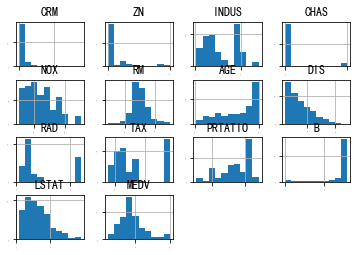

In [8]:
    # 直方图
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

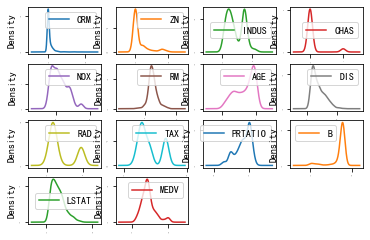

In [10]:
#密度图
data.plot(kind='density', subplots=True,layout=(4,4),sharex=False, fontsize=1)
pyplot.show()

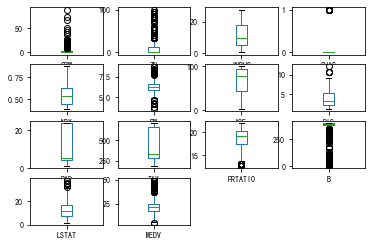

In [11]:
#箱体图
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=8)
pyplot.show()

**散点矩阵图：**（不同数据特征之间的相互影响）

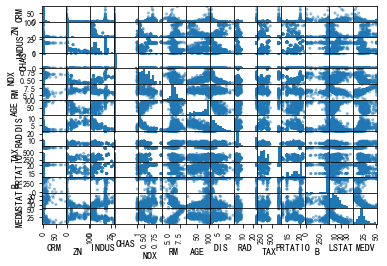

In [12]:
#散点矩阵图
scatter_matrix(data)
pyplot.show()

**相互影响的相关矩阵图：**

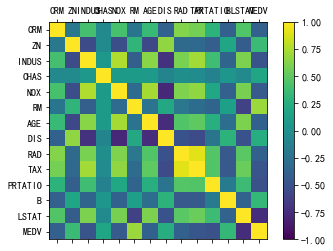

In [14]:
#相关矩阵图
fig = pyplot.figure()
ax = fig.add_subplot()
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks=np.arange(0, 14, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

**分离数据集：**

In [16]:
array = data.values
X = array[:, 0:13]
Y = array[:, 13]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

**评估算法：**

分析完数据不能立刻选择出哪个算法对需要解决的问题最有效。

由于部分数据的线性分布，线性回归算法和弹性网络回归算法对解决问题可能比较有效。

由于数据的离散化，通过决策树算法或支持向量机算法也许可以生成高准确度的模型。

需要设计一个评估框架来选择合适的算法。

我们采用10折交叉验证来分离数据，通过均方误差来比较算法的准确度。

均方误差越趋近于0，算法准确度越高。

我们选择三个线性算法和三个非线性算法来进行比较。

线性算法：线性回归（LR）、套索回归（LASSO）和弹性网络回归（EN）。

非线性算法：分类与回归树（CART）、支持向量机（SVM）和K近邻算法（KNN）。

In [22]:
# 评估算法——评估标准
num_folds=10
seed=7
scoring='neg_mean_squared_error'

# 评估算法- baseline
models={}
models['LR']=LinearRegression()
models['LASSO']=Lasso()
models['EN']=ElasticNet()
models['KNN'] =KNeighborsRegressor()
models['CART']=DecisionTreeRegressor()
models['SVM']=SVR()

对所有的算法使用默认参数，并比较算法的准确度，此处比较的是均方误差的均值和标准方差。代码如下：

In [25]:
# 评估算法
results=[]
for key in models:
    kfold=KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_result = cross_val_score(models[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%s: %f（%f）'%(key, cv_result.mean(), cv_result.std()))

LR: -22.006009（12.188886）
LASSO: -27.105803（13.165915）
EN: -27.923014（13.156405）
KNN: -39.808936（16.507968）
CART: -28.287384（20.687406）
SVM: -67.824705（32.801530）


从执行结果来看，线性回归（LR）具有最优的MSE，接下来是分类与回归树（CART）算法

**10折交叉分离验证：**

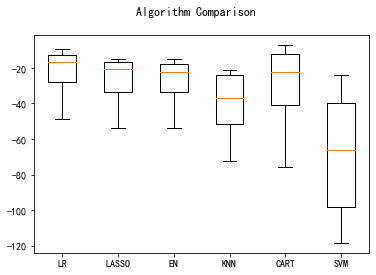

In [26]:
# 评估算法-箱线图
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

**正态化数据:**<br>
猜测也许因为原始数据中不同特征属性的度量单位不一样，导致有的算法的结果不是很好。接下来通过对数据进行正态化，再次评估这些算法。


In [32]:
# 评估算法——正态化数据
pipelines = {}
pipelines['ScalerLR'] = Pipeline([('Scaler',  StandardScaler()), ('LR',LinearRegression())])
pipelines['ScalerLASSO']=Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])
pipelines['ScalerEN']=Pipeline([('Scaler',StandardScaler()),('EN', ElasticNet())])
pipelines['ScalerKNN']=Pipeline([('Scaler',StandardScaler()),('KNN', KNeighborsRegressor())])
pipelines['ScalerCART']=Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])
pipelines['ScalerSVM']=Pipeline([('Scaler', StandardScaler()),('SVM', SVR())])
results=[]
for key in pipelines:
    kfold=KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_result=cross_val_score(pipelines[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%s: %f（%f）'%(key, cv_result.mean(), cv_result.std()))

ScalerLR: -22.006009（12.188886）
ScalerLASSO: -27.205896（12.124418）
ScalerEN: -28.301160（13.609110）
ScalerKNN: -21.456867（15.016218）
ScalerCART: -25.988120（17.535806）
ScalerSVM: -29.570433（18.052964）


执行后发现K近邻算法具有最优的MSE。

**看一下所有的10折交叉分离验证的结果:**

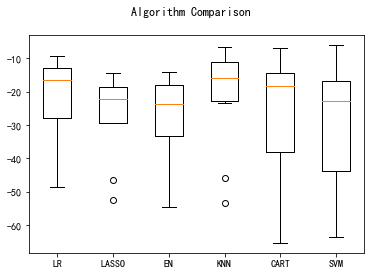

In [33]:
#评估算法——箱线图
fig=pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

可以看到K近邻算法具有最优的MSE和最紧凑的数据分布

五、优化模型

**调参改善算法：**

K近邻算法的默认参数近邻个数（n_neighbors）是5，下面通过网格搜索算法来优化参数。

In [40]:
# 调参改善算法——KNN
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
model=KNeighborsRegressor()
kfold=KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid=GridSearchCV(estimator=model,param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result=grid.fit(X=rescaledX, y=Y_train)
print('最优：%s使用%s'%(grid_result.best_score_, grid_result.best_params_))
cv_results=zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params'])
for mean, std, param in cv_results:
    print('%f（%f）with %r'%(mean, std, param))

最优：-19.497828658536584使用{'n_neighbors': 1}
-19.497829（15.769847）with {'n_neighbors': 1}
-19.977984（13.803973）with {'n_neighbors': 3}
-21.270967（14.833544）with {'n_neighbors': 5}
-21.577292（14.952592）with {'n_neighbors': 7}
-21.001075（14.701297）with {'n_neighbors': 9}
-21.490306（14.866957）with {'n_neighbors': 11}
-21.268533（14.454969）with {'n_neighbors': 13}
-21.968092（14.209894）with {'n_neighbors': 15}
-22.739880（14.492752）with {'n_neighbors': 17}
-23.506901（14.903224）with {'n_neighbors': 19}
-24.240303（15.156565）with {'n_neighbors': 21}


**集成算法:**

除调参之外，提高模型准确度的方法是使用集成算法。

下面对表现比较好的线性回归、K近邻、分类与回归树算法进行集成：

In [42]:
# 集成算法
ensembles={}
ensembles['ScaledAB']=Pipeline([('Scaler',StandardScaler()),('AB', AdaBoostRegressor())])
ensembles['ScaledAB-KNN']=Pipeline([('Scaler',StandardScaler()),('ABKNN', AdaBoostRegressor(base_estimator=KNeighborsRegressor(n_neighbors=3)))])
ensembles['ScaledAB-LR']=Pipeline([('Scaler',StandardScaler()),('ABLR',AdaBoostRegressor(LinearRegression()))])
ensembles['ScaledRFR']=Pipeline([('Scaler',StandardScaler()),('RFR', RandomForestRegressor())])
ensembles['ScaledETR']=Pipeline([('Scaler',StandardScaler()),('ETR', ExtraTreesRegressor())])
ensembles['ScaledGBR']=Pipeline([('Scaler',StandardScaler()),('RBR', GradientBoostingRegressor())])

results=[]
for key in ensembles:
    kfold=KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_result=cross_val_score(ensembles[key], X_train, Y_train, cv=kfold,scoring=scoring)
    results.append(cv_result)
    print('%s: %f（%f）'%(key, cv_result.mean(), cv_result.std()))

ScaledAB: -15.723110（8.449452）
ScaledAB-KNN: -15.608139（11.181930）
ScaledAB-LR: -23.583370（9.862048）
ScaledRFR: -12.595841（9.720819）
ScaledETR: -9.205703（6.233547）
ScaledGBR: -11.013154（8.660105）


通过箱线图看一下集成算法在10折交叉验证中均方误差的分布状况：

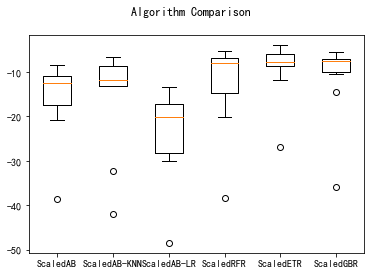

In [43]:
# 集成算法——箱线图
fig=pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(ensembles.keys())
pyplot.show()

**集成算法调参：**

集成算法都有一个参数n_estimators。对于集成参数来说，n_estimators会带来更准确的结果。

下面对随机梯度上升（GBM）和极端随机树（ET）算法进行调参，再次比较这两个算法模型的准确度，来确定最终的算法模型：

In [50]:
# 集成算法GBM——调参
caler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
param_grid={'n_estimators': [10, 50, 100, 200, 300, 400, 500, 600, 700, 800,900]}
model=GradientBoostingRegressor()
kfold=KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid=GridSearchCV(estimator=model,param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result=grid.fit(X=rescaledX, y=Y_train)
print('GBM最优：%s使用%s'%(grid_result.best_score_,grid_result.best_params_))


# 集成算法ET——调参
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
param_grid={'n_estimators': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
model=ExtraTreesRegressor()
kfold=KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid=GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring,cv=kfold)
grid_result=grid.fit(X=rescaledX, y=Y_train)
print('ET最优：%s使用%s'%(grid_result.best_score_, grid_result.best_params_))

GBM最优：-10.296103662284075使用{'n_estimators': 700}
ET最优：-9.103181363738177使用{'n_estimators': 70}


#### 确定最终模型：

我们已经确定了使用极端随机树（ET）算法来生成模型，下面就对该算法进行训练和生成模型，并计算模型的准确度。

In [51]:
#训练模型
caler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
gbr=ExtraTreesRegressor(n_estimators=80)
gbr.fit(X=rescaledX, y=Y_train)

ExtraTreesRegressor(n_estimators=80)

再通过评估数据集来评估算法的准确度:

In [52]:
# 评估算法模型
rescaledX_validation=scaler.transform(X_validation)
predictions=gbr.predict(rescaledX_validation)
print(mean_squared_error(Y_validation, predictions))

14.34152624080881
